# Problem Statement
### Auction: Player who can fulfill the role of pinch hitter for powerplay for SRH
#### *Player Analysis  *Team Analysis  *Batsmen evaluation for the particular role

### Keywords:
#### Pinch hitter: High SR, High ball_per_boundry, decent runs, decent balls faced
#### Powerplay
#### SRH Analysis by Team

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
deliveries=pd.read_csv("deliveries.csv")
matches=pd.read_csv("matches.csv")

### Terminologies used
* SR= Strike Rate
* RPI= Runs per Innings
* BPB= Balls per Boundry
* BPD= Balls per Dismissal

In [3]:
df=deliveries.copy()

In [4]:
df.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN


In [5]:
def player_stats(df):

    df["ones"]=df["batsman_runs"].apply(lambda x: 1 if x==1 else 0)
    df["dots"]=df["batsman_runs"].apply(lambda x: 1 if x==0 else 0)
    df["twos"]=df["batsman_runs"].apply(lambda x: 1 if x==2 else 0)
    df["threes"]=df["batsman_runs"].apply(lambda x: 1 if x==3 else 0)
    df["fours"]=df["batsman_runs"].apply(lambda x: 1 if x==4 else 0)
    df["sixes"]=df["batsman_runs"].apply(lambda x: 1 if x==6 else 0)


    Runs=pd.DataFrame(df.groupby("batter")["batsman_runs"].sum()).reset_index().rename(columns={"batsman_runs":"runs"})

    Innings=pd.DataFrame(df.groupby("batter")["match_id"].apply(lambda x: len(list(np.unique(x))))).reset_index().rename(columns={"match_id":"innings"})

    Balls=pd.DataFrame(df.groupby("batter")["match_id"].count()).reset_index().rename(columns={"match_id":"balls"})

    Dismissals=pd.DataFrame(df.groupby("batter")["player_dismissed"].count()).reset_index().rename(columns={"player_dismissed":"dismissals"})

    Dots=pd.DataFrame(df.groupby("batter")["dots"].sum()).reset_index()

    Ones=pd.DataFrame(df.groupby("batter")["ones"].sum()).reset_index()

    Twos=pd.DataFrame(df.groupby("batter")["twos"].sum()).reset_index()

    Threes=pd.DataFrame(df.groupby("batter")["threes"].sum()).reset_index()

    Fours=pd.DataFrame(df.groupby("batter")["fours"].sum()).reset_index()

    Sixes=pd.DataFrame(df.groupby("batter")["sixes"].sum()).reset_index()

    df=pd.merge(Runs,Innings, on="batter").merge(Balls,on="batter").merge(Dismissals,on="batter").merge(Dots,on="batter").merge(Ones,on="batter").merge(Twos,on="batter").merge(Threes,on="batter").merge(Fours,on="batter").merge(Sixes,on="batter")

    df["SR"]=df.apply(lambda x: 100*(x["runs"]/x["balls"]),axis=1)

    df["RPI"]=df.apply(lambda x: (x["runs"]/x["innings"]),axis=1)

    df["BPB"] = df.apply(lambda x: (x["balls"] / (x["fours"] + x["sixes"])) if (x["fours"] + x["sixes"]) != 0 else 0, axis=1)

    df["BPD"]= df.apply(lambda x: (x["balls"]/x["dismissals"]) if x["dismissals"] != 0 else 0, axis=1)
    
    return df

In [6]:
df= player_stats(deliveries)

In [7]:
df

,batter,runs,innings,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPB,BPD
0,A Ashish Reddy,280,23,196,15,61,83,20,1,16,15,142.857143,12.173913,6.322581,13.066667
1,A Badoni,634,35,505,26,183,201,48,3,46,24,125.544554,18.114286,7.214286,19.423077
2,A Chandila,4,2,7,1,3,4,0,0,0,0,57.142857,2.000000,0.000000,7.000000
3,A Chopra,53,6,75,5,45,21,2,0,7,0,70.666667,8.833333,10.714286,15.000000
4,A Choudhary,25,3,20,2,4,13,1,0,1,1,125.000000,8.333333,10.000000,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,Yashpal Singh,47,4,67,4,39,20,2,1,5,0,70.149254,11.750000,13.400000,16.750000
669,Younis Khan,3,1,7,1,4,3,0,0,0,0,42.857143,3.000000,0.000000,7.000000
670,Yudhvir Singh,22,4,16,4,8,4,1,0,1,2,137.500000,5.500000,5.333333,4.000000
671,Yuvraj Singh,2754,126,2207,109,977,741,119,3,218,149,124.784776,21.857143,6.013624,20.247706


### Performances in different phases  

In [8]:
def phase(over):
    if over < 6:
        return "Power_play"
    elif over < 15:
        return "Middle_overs"
    else:
        return "Death_overs"

In [9]:
deliveries["phase"]=deliveries["over"].apply(lambda x: phase(x))

In [10]:
def phase_of_play(df, current_phase):
    df=df[df.phase == current_phase]
    df.reset_index(inplace=True, drop= True)
    
    df["ones"]=df["batsman_runs"].apply(lambda x: 1 if x==1 else 0)
    df["dots"]=df["batsman_runs"].apply(lambda x: 1 if x==0 else 0)
    df["twos"]=df["batsman_runs"].apply(lambda x: 1 if x==2 else 0)
    df["threes"]=df["batsman_runs"].apply(lambda x: 1 if x==3 else 0)
    df["fours"]=df["batsman_runs"].apply(lambda x: 1 if x==4 else 0)
    df["sixes"]=df["batsman_runs"].apply(lambda x: 1 if x==6 else 0)


    Runs=pd.DataFrame(df.groupby("batter")["batsman_runs"].sum()).reset_index().rename(columns={"batsman_runs":"runs"})

    Innings=pd.DataFrame(df.groupby("batter")["match_id"].apply(lambda x: len(list(np.unique(x))))).reset_index().rename(columns={"match_id":"innings"})

    Balls=pd.DataFrame(df.groupby("batter")["match_id"].count()).reset_index().rename(columns={"match_id":"balls"})

    Dismissals=pd.DataFrame(df.groupby("batter")["player_dismissed"].count()).reset_index().rename(columns={"player_dismissed":"dismissals"})

    Dots=pd.DataFrame(df.groupby("batter")["dots"].sum()).reset_index()

    Ones=pd.DataFrame(df.groupby("batter")["ones"].sum()).reset_index()

    Twos=pd.DataFrame(df.groupby("batter")["twos"].sum()).reset_index()

    Threes=pd.DataFrame(df.groupby("batter")["threes"].sum()).reset_index()

    Fours=pd.DataFrame(df.groupby("batter")["fours"].sum()).reset_index()

    Sixes=pd.DataFrame(df.groupby("batter")["sixes"].sum()).reset_index()

    df=pd.merge(Runs,Innings, on="batter").merge(Balls,on="batter").merge(Dismissals,on="batter").merge(Dots,on="batter").merge(Ones,on="batter").merge(Twos,on="batter").merge(Threes,on="batter").merge(Fours,on="batter").merge(Sixes,on="batter")

    df["SR"]=df.apply(lambda x: 100*(x["runs"]/x["balls"]),axis=1)

    df["RPI"]=df.apply(lambda x: (x["runs"]/x["innings"]),axis=1)

    df["BPB"] = df.apply(lambda x: (x["balls"] / (x["fours"] + x["sixes"])) if (x["fours"] + x["sixes"]) != 0 else 0, axis=1)

    df["BPD"]= df.apply(lambda x: (x["balls"]/x["dismissals"]) if x["dismissals"] != 0 else 0, axis=1)
    
    return df

In [11]:
pp_df= phase_of_play(deliveries, "Power_play")
mp_df= phase_of_play(deliveries,"Middle_overs")
dp_df= phase_of_play(deliveries, "Death_overs")

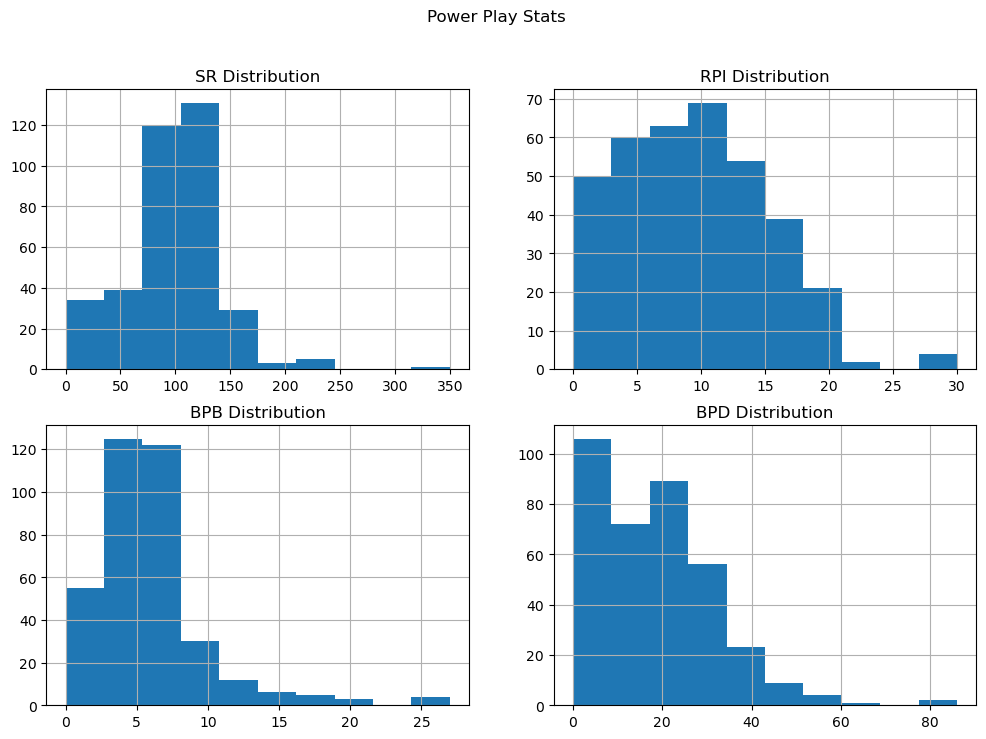

In [12]:
plt.figure(figsize=(12,8))

plt.subplot(221)
pp_df.SR.hist()
plt.title("SR Distribution")

plt.subplot(222)
pp_df.RPI.hist()
plt.title("RPI Distribution")

plt.subplot(223)
pp_df.BPB.hist()
plt.title("BPB Distribution")

plt.subplot(224)
pp_df.BPD.hist()
plt.title("BPD Distribution")

plt.suptitle("Power Play Stats")

plt.show()

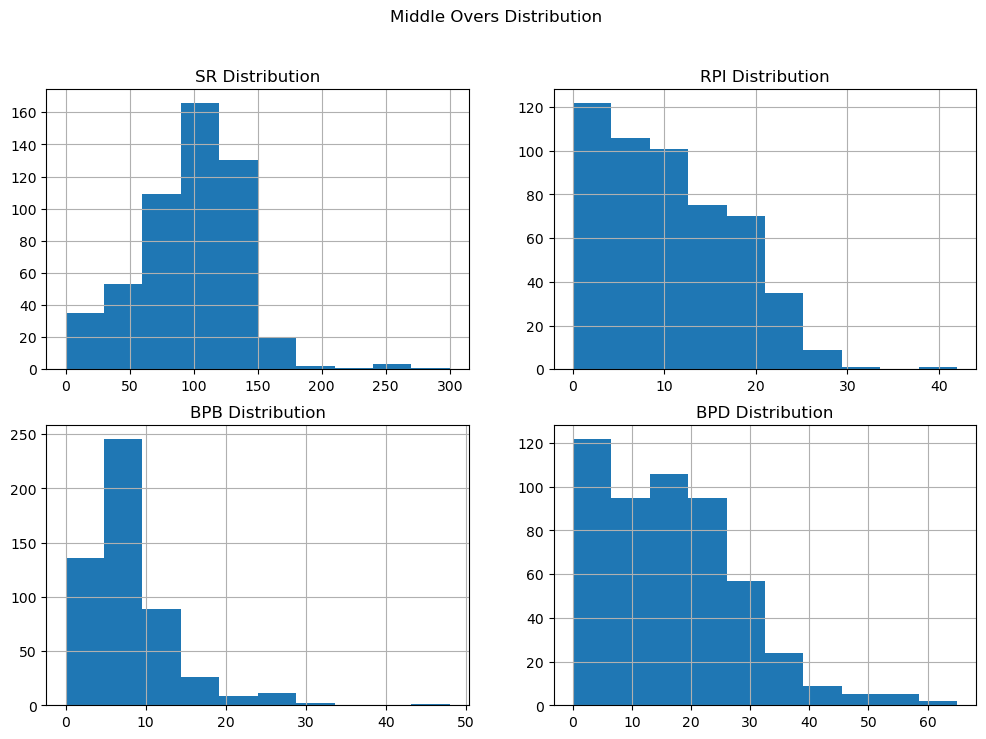

In [13]:
plt.figure(figsize=(12,8))

plt.subplot(221)
mp_df.SR.hist()
plt.title("SR Distribution")

plt.subplot(222)
mp_df.RPI.hist()
plt.title("RPI Distribution")

plt.subplot(223)
mp_df.BPB.hist()
plt.title("BPB Distribution")

plt.subplot(224)
mp_df.BPD.hist()
plt.title("BPD Distribution")

plt.suptitle("Middle Overs Distribution")
plt.show()

In [14]:
import seaborn as sns

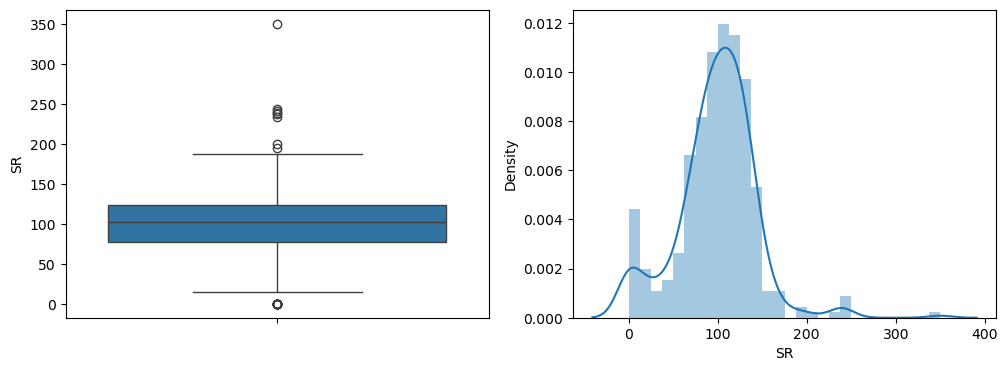

In [15]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.boxplot(pp_df["SR"])

plt.subplot(122)
sns.distplot(pp_df["SR"])
plt.show()

In [16]:
wt_sr, wt_rpi, wt_bpd, wt_bpb= 0.38, 0.25, 0.12, 0.26

In [17]:
# filtering by 20 innings
pp_df= pp_df[pp_df.innings >= 20]
pp_df.reset_index(inplace=True, drop=True)

In [18]:
# Calculations

In [19]:
pp_df["calc_SR"]= pp_df["SR"].apply(lambda x: x*x)
pp_df["calc_RPI"]= pp_df["RPI"].apply(lambda x: x*x)
pp_df["calc_BPD"]=pp_df["BPD"].apply(lambda x: x*x)
pp_df["calc_BPB"]=pp_df["BPB"].apply(lambda x: x*x)

sq_sr, sq_rpi, sq_bpd, sq_bpb= np.sqrt(pp_df[["calc_SR","calc_RPI","calc_BPD","calc_BPB"]].sum(axis=0))

pp_df["calc_SR"]= pp_df["calc_SR"].apply(lambda x: x/sq_sr)
pp_df["calc_RPI"]= pp_df["calc_RPI"].apply(lambda x: x/sq_rpi)
pp_df["calc_BPD"]=pp_df["calc_BPD"].apply(lambda x: x/sq_bpd)
pp_df["calc_BPB"]=pp_df["calc_BPB"].apply(lambda x: x/sq_bpb)

pp_df["calc_SR"]= pp_df["calc_SR"].apply(lambda x: x*wt_sr)
pp_df["calc_RPI"]= pp_df["calc_RPI"].apply(lambda x: x*wt_rpi)
pp_df["calc_BPD"]=pp_df["calc_BPD"].apply(lambda x: x*wt_bpd)
pp_df["calc_BPB"]=pp_df["calc_BPB"].apply(lambda x: x*wt_bpb)

best_sr, worst_sr = max(pp_df["calc_SR"]), min(pp_df["calc_SR"])
best_rpi, worst_rpi = max(pp_df["calc_RPI"]), min(pp_df["calc_RPI"])
best_bpd, worst_bpd = max(pp_df["calc_BPD"]), min(pp_df["calc_BPD"])
best_bpb, worst_bpb =  max(pp_df["calc_BPB"]), min(pp_df["calc_BPB"])


In [20]:
# Calculation- Comparison against the best and the worst

In [21]:
pp_df["dev_best_SR"]= pp_df["calc_SR"].apply(lambda x: (x-best_sr)*(x-best_sr))
pp_df["dev_best_RPI"]= pp_df["calc_RPI"].apply(lambda x: (x-best_rpi)*(x-best_rpi))
pp_df["dev_best_BPD"]= pp_df["calc_BPD"].apply(lambda x: (x-best_bpd)*(x-best_bpd))
pp_df["dev_best_BPB"]= pp_df["calc_BPB"].apply(lambda x: (x-best_bpb)*(x-best_bpb))

pp_df["dev_best_sqrt"]= pp_df.apply(lambda x: x["dev_best_SR"]+ x["dev_best_RPI"]+ x["dev_best_BPD"]+ x["dev_best_BPB"], axis=1)

pp_df["dev_worst_SR"]= pp_df["calc_SR"].apply(lambda x: (x-worst_sr)*(x-worst_sr))
pp_df["dev_worst_RPI"]= pp_df["calc_RPI"].apply(lambda x: (x-worst_rpi)*(x-worst_rpi))
pp_df["dev_worst_BPD"]= pp_df["calc_BPD"].apply(lambda x: (x-worst_bpd)*(x-worst_bpd))
pp_df["dev_worst_BPB"]= pp_df["calc_BPB"].apply(lambda x: (x-worst_bpb)*(x-worst_bpb))

pp_df["dev_worst_sqrt"]= pp_df.apply(lambda x: x["dev_worst_SR"]+ x["dev_worst_RPI"]+ x["dev_worst_BPD"]+ x["dev_worst_BPB"], axis=1)

In [22]:
# Final step for the scores 

In [23]:
pp_df["Scores"]= pp_df.apply(lambda x: x["dev_worst_sqrt"]/(x["dev_worst_sqrt"]+ x["dev_best_sqrt"]),axis=1)

In [24]:
pp_df[["batter","Scores"]].head()

,batter,Scores
0,AB de Villiers,0.098046
1,AC Gilchrist,0.187400
2,AJ Finch,0.058068
3,AK Markram,0.007652
4,AM Rahane,0.084891


In [25]:
pp_df[["batter", "runs","innings","balls","dismissals","dots","ones","fours","sixes","SR","RPI","BPB","BPD","Scores"]].sort_values(by="Scores", ascending=False).head(10)

,batter,runs,innings,balls,dismissals,dots,ones,fours,sixes,SR,RPI,BPB,BPD,Scores
82,TM Head,412,20,211,8,77,50,53,22,195.260664,20.600000,2.813333,26.375000,0.946892
72,SP Narine,946,58,577,41,288,94,119,55,163.951473,16.310345,3.316092,14.073171,0.700115
6,Abhishek Sharma,758,40,501,22,218,129,90,35,151.297405,18.950000,4.008000,22.772727,0.509745
88,YBK Jaiswal,1009,52,677,25,328,136,149,36,149.039882,19.403846,3.659459,27.080000,0.476789
33,JM Bairstow,864,47,606,22,279,156,113,34,142.574257,18.382979,4.122449,27.545455,0.374007
55,P Simran Singh,499,31,350,20,174,72,63,23,142.571429,16.096774,4.069767,17.500000,0.366148
58,PP Shaw,1347,79,946,51,416,250,193,37,142.389006,17.050633,4.113043,18.549020,0.364639
10,CA Lynn,779,40,553,17,271,131,99,37,140.867993,19.475000,4.066176,32.529412,0.353543
21,E Lewis,420,22,298,13,145,70,49,21,140.939597,19.090909,4.257143,22.923077,0.347362
89,YK Pathan,361,33,256,12,125,59,47,16,141.015625,10.939394,4.063492,21.333333,0.342136
